In [12]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, avg_abundance, total_stellar_mass

redshift = 5

In [9]:
with h5py.File('galaxy_population_data_'+str(redshift)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]

In [40]:
# axes limits
M_lim = [10.5, 12]
logRe_lim = [-0.7, 1.94]
MRe_lim = [9.36, 11.89]
FeHRe_lim = [-0.39, 0.53]
FeH1kpc_lim = [-0.3, 0.53]
MgFeRe_lim = [0.21, 0.55]
MgFe1kpc_lim = [0.16, 0.55]
MgHRe_lim = [-0.03, 0.77]
MgH1kpc_lim = [0.16, 0.54]
age_lim = [0, 2.5]
ageabundance_lim = [-1.8, 0.9]
bigage_lim = [0, 1]


In [28]:
import warnings
warnings.filterwarnings('ignore')

# z=2 parameters
# 1.2 -> 0.8 Gyr
# 1.5 -> 1.0 Gyr
# -10.5 -> -9.5
PSB_selection = (median_age<=0.8)&(np.log10(newbin_current_SFR/10**(total_mass))<=-9.5)
intermediate_quiescent_selection = (median_age>0.8)&(median_age<=1.0)&(np.log10(newbin_current_SFR/10**(total_mass))<=-9.5)
old_quiescent_selection = (median_age>1.0)&(np.log10(newbin_current_SFR/10**(total_mass))<=-9.5)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-9.5)

In [14]:
print(len(ids[starforming_selection]))
print(len(ids[PSB_selection]))
print(len(ids[intermediate_quiescent_selection]))
print(len(ids[old_quiescent_selection]))

0
335
27
2


# download z=5 galaxies

In [7]:
#this initializes the values in simulation_data.galaxies.galaxy_population
# id_dict = {}
# id_dict[0] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=10.8)
# id_dict[1] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.8, mass_max=11.1)
# id_dict[2] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.1, mass_max=11.4)
# id_dict[3] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.4, mass_max=11.7)
# id_dict[4] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.7, mass_max=12.0)

id_range = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12.0)
print(len(id_range))

for idx in id_range:
    get_galaxy_particle_data(id=idx, redshift=redshift, populate_dict=False)

#this gets and saves the particle data for each galaxy in our selection
# ids = []
# for b in id_dict:
#     np.random.seed(13)
#     for idx in np.random.choice(id_dict[b], 10, replace=False):
#         ids.append(idx)
#         #get_galaxy_particle_data(id=idx, redshift=redshift, populate_dict=False)

20


In [8]:
#this initializes the values in simulation_data.galaxies.galaxy_population
ids = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12)
print(len(ids))

#calculate halo properties and store calculated data
my_galaxy_population.get_galaxy_population_data()

20
20


{'ids': array([   0,  101,  473,  623,  758, 1083, 1182, 1260, 1490, 2039, 2245,
        2465, 2545, 3000, 4030, 4117, 4552, 4905, 5183, 5267]),
 'median_age': array([0.15117372, 0.17645635, 0.16355056, 0.34277616, 0.13021504,
        0.14820095, 0.09353393, 0.1741194 , 0.09907722, 0.25011736,
        0.28767474, 0.16397067, 0.26670857, 0.08396717, 0.15683608,
        0.21893649, 0.24838053, 0.12420085, 0.10673563, 0.28768253]),
 'halfmass_radius': array([0.47283732, 0.52138077, 0.23641866, 0.72313257, 0.57696093,
        0.33043008, 0.7366893 , 0.39769708, 1.00273103, 0.54224486,
        0.33827871, 0.40249483, 0.35099892, 0.29918315, 0.40242102,
        0.25110717, 1.13433717, 0.9238264 , 0.29172818, 0.3585277 ]),
 'total_mass': array([11.30951198, 11.04050529, 10.80755021, 10.65828608, 10.73267861,
        10.83739252, 10.70695376, 10.66431185, 10.51868099, 10.78270912,
        10.94007527, 10.75681078, 10.73638944, 10.74110459, 10.68696277,
        10.59582544, 10.52120798, 10.5052

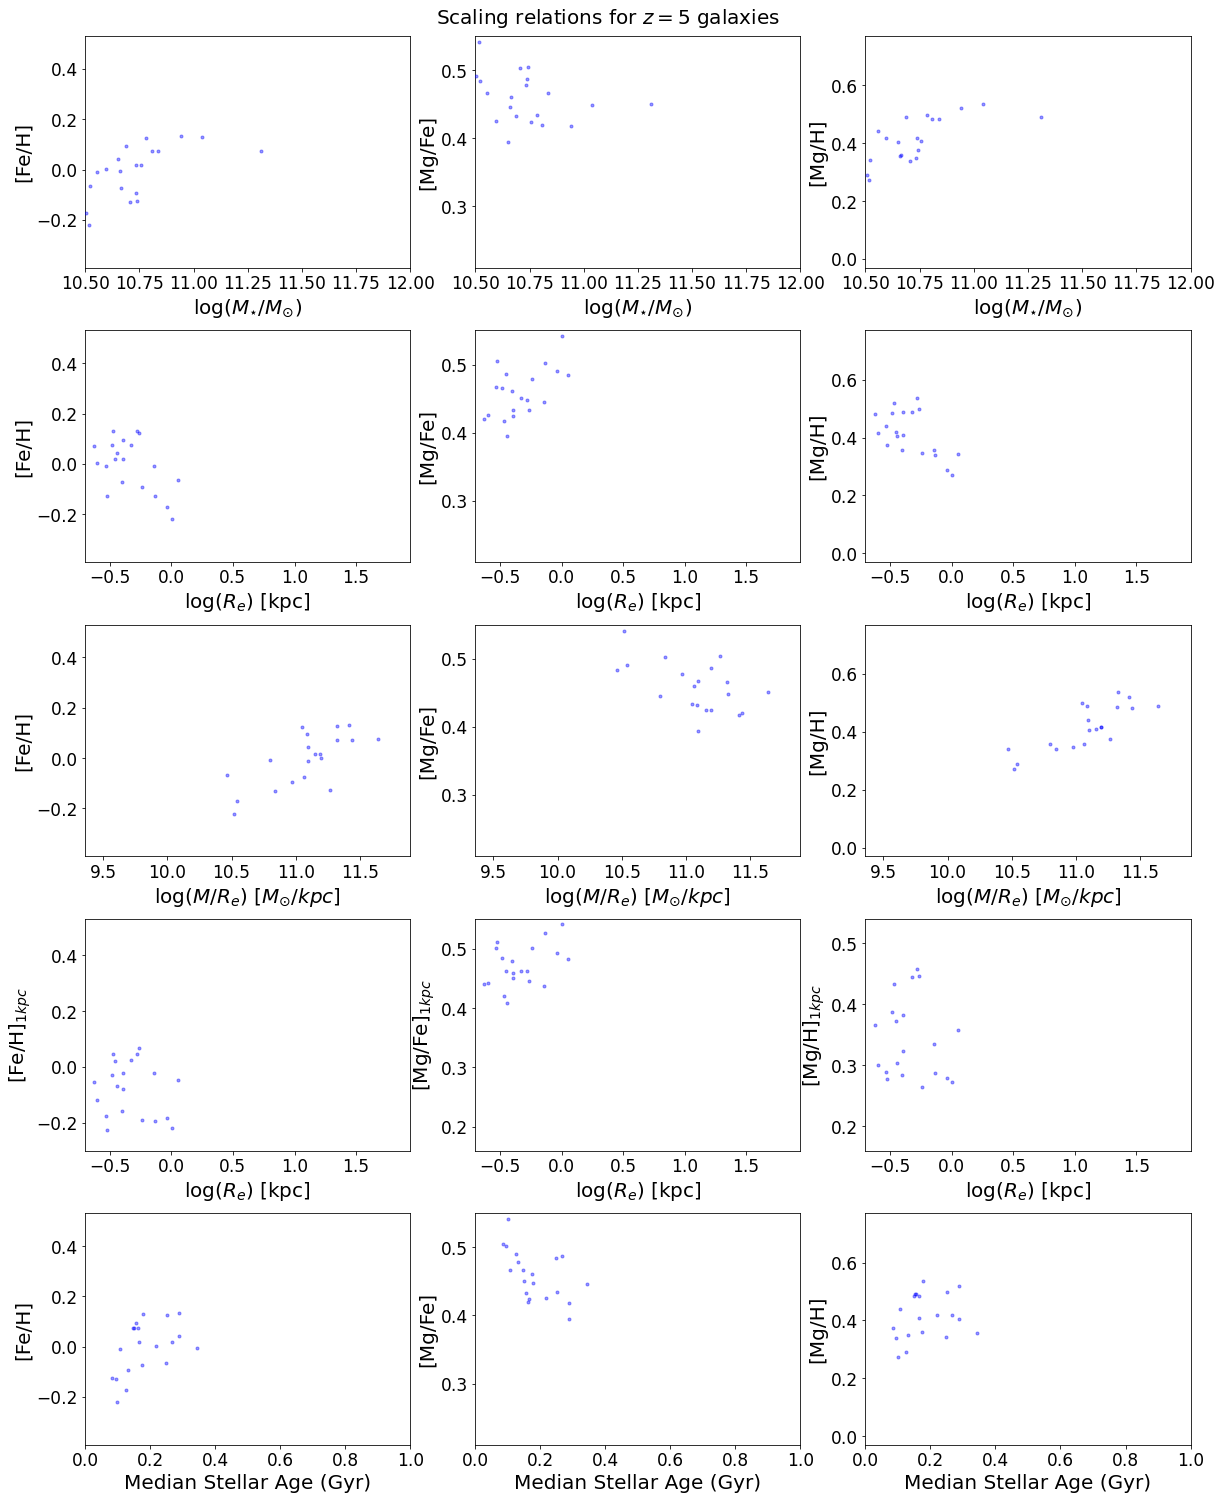

In [41]:
fig = plt.figure(1,figsize=(17,21))
fig.clf()
markersize = 6
fts = 20
fts_s = 17

gs0 = gridspec.GridSpec(5, 1)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
xx = [total_mass, np.log10(halfmass_radius), np.log10(10**total_mass / halfmass_radius), np.log10(halfmass_radius), median_age]
yy_Re = [FeH_Re, MgFe_Re, MgH_Re]
yy_1kpc = [FeH_1kpc, MgFe_1kpc, MgH_1kpc]
xlim = [M_lim, logRe_lim, MRe_lim, logRe_lim, bigage_lim]
ylim_Re = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
ylim_1kpc = [FeH1kpc_lim, MgFe1kpc_lim, MgH1kpc_lim]
xlabel = ['log($M_{\star}/M_{\odot}$)', 'log($R_e$) [kpc]', 'log($M/R_e)$ $[M_{\odot}/kpc]$', 'log($R_e$) [kpc]', 'Median Stellar Age (Gyr)']
ylabel_Re = ['[Fe/H]', '[Mg/Fe]', '[Mg/H]']
ylabel_1kpc = ['[Fe/H]$_{1kpc}$', '[Mg/Fe]$_{1kpc}$', '[Mg/H]$_{1kpc}$']

for m in range(5):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[m])

for m in range(5):
    for k in range(3):
        ax = plt.subplot(gs[m][k])
        
        if m == 3:
            yy = yy_1kpc
            ylabel = ylabel_1kpc
            ylim = ylim_1kpc
        else:
            yy = yy_Re
            ylabel = ylabel_Re
            ylim = ylim_Re
        
        plt.plot(xx[m], yy[k], 'b.', alpha=0.4, label='star-forming', markersize=markersize, zorder=4)
        
#         yy1 = yy[k][starforming_selection]
#         xx1 = xx[m][starforming_selection]
#         plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', markersize=markersize, zorder=4)

#         yy2 = yy[k][PSB_selection]
#         xx2 = xx[m][PSB_selection]
#         plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

#         yy3 = yy[k][intermediate_quiescent_selection]
#         xx3 = xx[m][intermediate_quiescent_selection]
#         plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quies.', markersize=markersize)

#         yy4 = yy[k][old_quiescent_selection]
#         xx4 = xx[m][old_quiescent_selection]
#         plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)
        
        ax.set_xlim(xlim[m][0], xlim[m][1])
        ax.set_ylim(ylim[k][0], ylim[k][1])
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[k], fontsize=fts)
        ax.tick_params(labelsize=fts_s)
        
#         if k==2 and m==0:
#             ax.legend(fontsize=fts_s-2)
        
fig.suptitle('Scaling relations for $z=$' + str(redshift) + ' galaxies', fontsize=fts, y=0.99)
fig.tight_layout()

# plt.savefig('FIGURES\scaling0p7.png', dpi=400)

## [Fe/H]

Text(0.5, 1.0, 'z=3 galaxies')

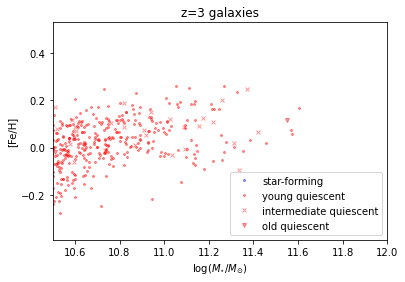

In [29]:
markersize=4

plt.figure()

yy = FeH_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Fe/H]')
plt.legend()
plt.title('z=' + str(redshift) + ' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

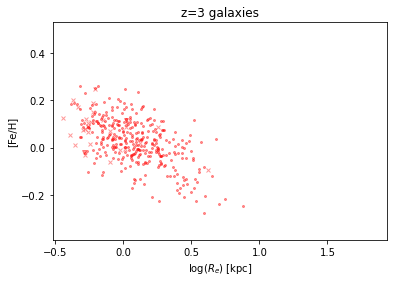

In [30]:
markersize=4

plt.figure()

yy = FeH_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

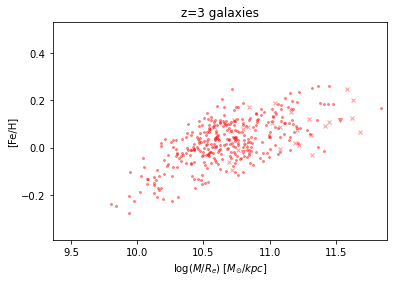

In [18]:
markersize=4

plt.figure()

yy = FeH_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

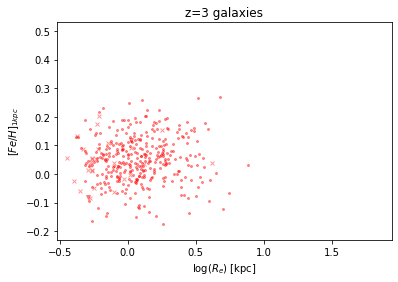

In [52]:
markersize=4

plt.figure()

yy = FeH_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(FeH1kpc_lim[0], FeH1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Fe/H]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

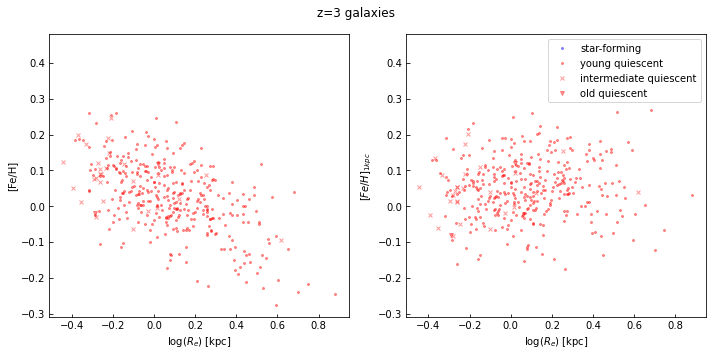

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
markersize = 4
ymin = -0.31
ymax = 0.48

yya = FeH_Re
yyb = FeH_1kpc
xx = np.log10(halfmass_radius)

yya1 = yya[starforming_selection]
yyb1 = yyb[starforming_selection]
xx1 = xx[starforming_selection]
ax1.plot(xx1, yya1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)
ax2.plot(xx1, yyb1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yya2 = yya[PSB_selection]
yyb2 = yyb[PSB_selection]
xx2 = xx[PSB_selection]
ax1.plot(xx2, yya2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)
ax2.plot(xx2, yyb2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yya3 = yya[intermediate_quiescent_selection]
yyb3 = yyb[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
ax1.plot(xx3, yya3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)
ax2.plot(xx3, yyb3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yya4 = yya[old_quiescent_selection]
yyb4 = yyb[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
ax1.plot(xx4, yya4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)
ax2.plot(xx4, yyb4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

ax1.set_xlabel('log($R_e$) [kpc]')
ax1.set_ylabel('[Fe/H]')
ax1.set_ylim(ymin, ymax)
ax1.tick_params(axis='y', which='minor', left=True)
ax1.tick_params(axis='both', which='both', direction='in')

ax2.set_xlabel('log($R_e$) [kpc]')
ax2.set_ylabel('$[Fe/H]_{1 kpc}$')
ax2.set_ylim(ymin, ymax)
ax2.tick_params(axis='y', which='minor', left=True)
ax2.tick_params(axis='both', which='both', direction='in')
ax2.legend()

f.suptitle('z=' + str(redshift) +' galaxies')

f.tight_layout()

Text(0.5, 1.0, 'z=3 galaxies')

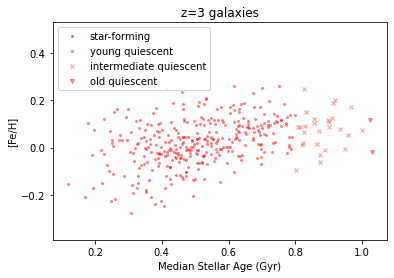

In [17]:
markersize=4

plt.figure()

yy = FeH_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

#plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Fe/H]')
plt.legend()
plt.title('z='+str(redshift)+' galaxies')

## [Mg/Fe]

Text(0.5, 1.0, 'z=3 galaxies')

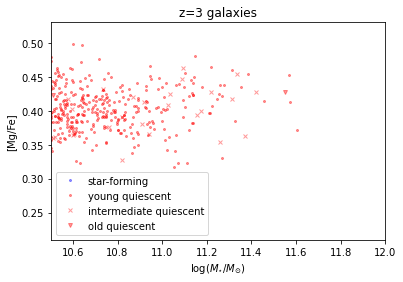

In [58]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Mg/Fe]')
plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

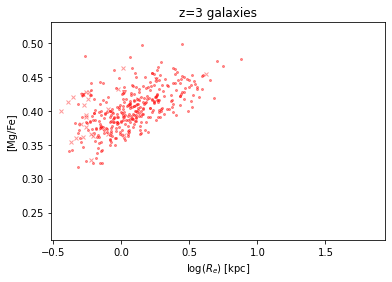

In [57]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

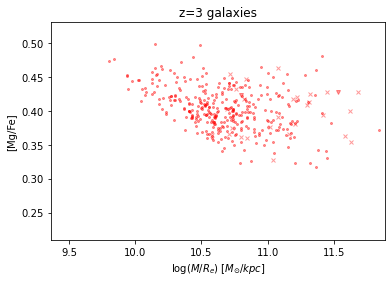

In [56]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

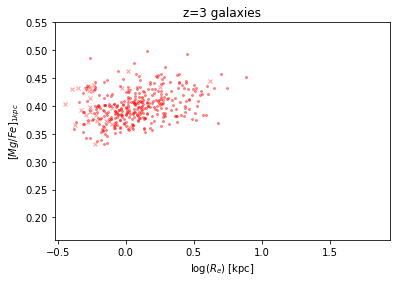

In [59]:
markersize=4

plt.figure()

yy = MgFe_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgFe1kpc_lim[0], MgFe1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Mg/Fe]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

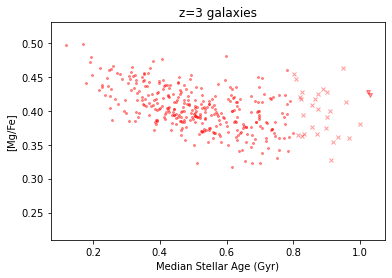

In [16]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

#plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

## [Mg/H]

Text(0.5, 1.0, 'z=3 galaxies')

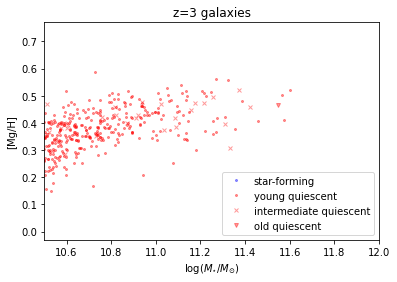

In [60]:
markersize=4

plt.figure()

yy = MgH_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Mg/H]')
plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

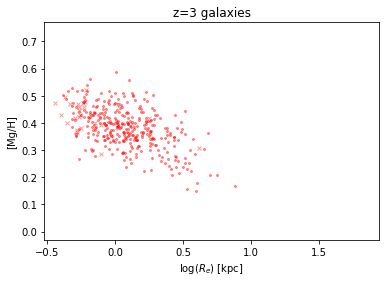

In [61]:
markersize=4

plt.figure()

yy = MgH_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

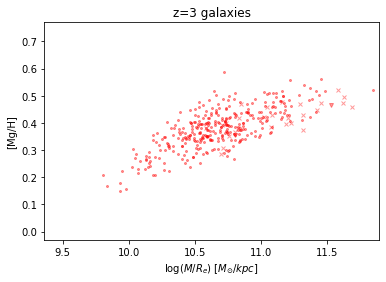

In [62]:
markersize=4

plt.figure()

yy = MgH_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

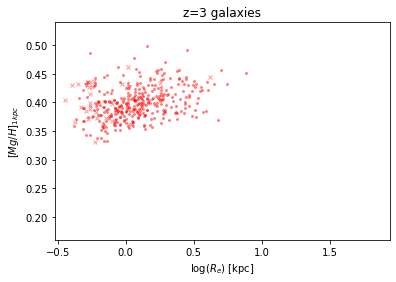

In [63]:
markersize=4

plt.figure()

yy = MgFe_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgH1kpc_lim[0], MgH1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Mg/H]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=3 galaxies')

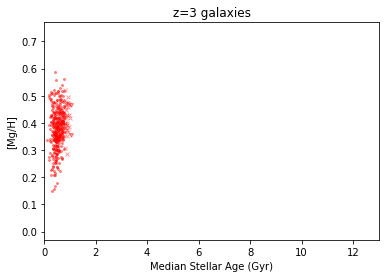

In [19]:
markersize=4

plt.figure()

yy = MgH_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.4, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.4, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.4, label='old quiescent', markersize=markersize)

plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')